# Stock market forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('AZN.csv',header=0, index_col=0)

In [3]:
data = data[-2600:-400] #choosing a specific time interval to avoid Covid-19 data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-19,26.045000,26.205000,25.735001,25.875000,16.469702,2565200
2010-10-20,26.035000,26.455000,26.025000,26.385000,16.794325,2072600
2010-10-21,26.135000,26.170000,25.830000,26.055000,16.584276,2281000
2010-10-22,25.775000,26.120001,25.745001,26.059999,16.587458,2592000
2010-10-25,26.025000,26.165001,25.955000,26.025000,16.565178,3179600
...,...,...,...,...,...,...
2019-07-11,40.919998,40.930000,40.200001,40.450001,38.924839,2342500
2019-07-12,40.349998,40.369999,39.849998,40.209999,38.693890,3229700
2019-07-15,40.259998,40.410000,40.060001,40.220001,38.703514,2002700


In [4]:
n,p=data.shape
print(n,p)

2200 6


In [5]:
data.isnull().sum()*100/n

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 2010-10-19 to 2019-07-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2200 non-null   float64
 1   High       2200 non-null   float64
 2   Low        2200 non-null   float64
 3   Close      2200 non-null   float64
 4   Adj Close  2200 non-null   float64
 5   Volume     2200 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 120.3+ KB


In [7]:
# correlation read
corr = data.corr()
#pd.plotting.scatter_matrix(corr);
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999476,0.999370,0.998943,0.967007,0.179030
High,0.999476,1.000000,0.999306,0.999543,0.967585,0.187272
Low,0.999370,0.999306,1.000000,0.999525,0.967772,0.168040
Close,0.998943,0.999543,0.999525,1.000000,0.968018,0.178179
Adj Close,0.967007,0.967585,0.967772,0.968018,1.000000,0.168947
Volume,0.179030,0.187272,0.168040,0.178179,0.168947,1.000000


<AxesSubplot:xlabel='Date'>

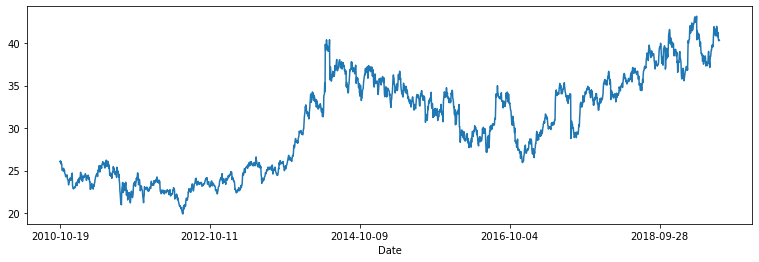

In [8]:
#visiluation
plt.figure(figsize=(13,4))
data['Open'].plot()
#data['Volume'].plot()
#On peut y remarquer la crise de 2008

(1756,)
(440,)
40.330002


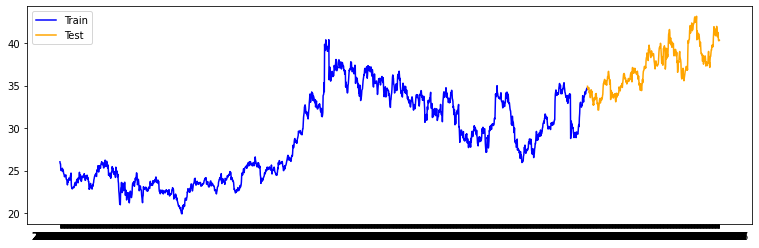

In [24]:
# train test split
k = int(n*0.8) #index de 80%
train = data['Open'][4:k] #80% de la data %j'ai manipulé les nombres pour avoirs des multiples de 5 convenant aux 5 jours ouvrables
test = data['Open'][k:] # 20% de la data

print(train.shape)
print(test.shape)
print(test[-1])

#visiluation
plt.figure(figsize=(13,4))
plt.plot(train, 'blue', test, 'orange')
plt.legend(["Train","Test"])
plt.show()

In [25]:
# Data normalisation
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scalar.fit_transform(train.to_numpy().reshape(-1, 1))
test_set_scaled = scalar.transform(test.to_numpy().reshape(-1,1))
#test_set_scaled.shape

In [26]:
# Creation de vecteur entré adapté aux travails des LSTM : ie création d'une matrice nlignes,60 input, 1output
# Creating a data structure with 60 time-steps and 30 output for the LSTM model
# ie si je veux prédire de la date j courante à j+30 

times_steps = 30 #définir le nombre de time-steps : avec 60 time-steps le réseau s'entraine en 8min, avec 120 il faut 30min
jour_predit = 30

X_train = []
y_train = []
for i in range(times_steps, k-jour_predit-3):
    X_train.append(training_set_scaled[i-times_steps:i, 0])
    y_train.append(np.array(training_set_scaled[i:i+jour_predit, 0]))
X_train = np.array(X_train)
y_train = np.array(y_train)

#y_train = y_train[]
#y_train = np.array(y_train)
#print(y_train.shape)
#print(X_train.shape)

#visualtion de ces vecteurs:
#plt.plot(X_train) 
#plt.plot(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(1697, 30, 1)
(1697, 30, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#from keras.models import *

In [28]:
#Creation de mon réseu : 4 LSTM et 1 Dense(outputlayer)

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(y_train.shape[1]))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 200) # a la base c'était epochs = 100 et batch size 32 mais moi je l'ai 
#changé pour diminuer le temps d'entrainement de 30min à 8min
#pour entrainer sur aa.us, utiliser epoch = 50 et batch_size 400

#A ajouter : Sauvegarder le model 


Epoch 1/100
9/9 [==============================] - 7s 87ms/step - loss: 0.2256
Epoch 2/100
9/9 [==============================] - 1s 85ms/step - loss: 0.0919
Epoch 3/100
9/9 [==============================] - 1s 85ms/step - loss: 0.0544
Epoch 4/100
9/9 [==============================] - 1s 86ms/step - loss: 0.0336
Epoch 5/100
9/9 [==============================] - 1s 84ms/step - loss: 0.0268
Epoch 6/100
9/9 [==============================] - 1s 82ms/step - loss: 0.0234
Epoch 7/100
9/9 [==============================] - 1s 84ms/step - loss: 0.0205
Epoch 8/100
9/9 [==============================] - 1s 85ms/step - loss: 0.0204
Epoch 9/100
9/9 [==============================] - 1s 84ms/step - loss: 0.0183
Epoch 10/100
9/9 [==============================] - 1s 85ms/step - loss: 0.0178
Epoch 11/100
9/9 [==============================] - 1s 83ms/step - loss: 0.0177
Epoch 12/100
9/9 [==============================] - 1s 85ms/step - loss: 0.0178
Epoch 13/100
9/9 [==============================]

In [29]:
#model.save('best_model_for_MSFT')

In [30]:
#model = load_model('best_model_for_MSFT')

In [31]:
inputs = np.concatenate((training_set_scaled[-times_steps:],test_set_scaled),axis=0) 

X_test = []
for i in range(times_steps, len(inputs)+1):
    X_test.append(inputs[i-times_steps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(test.values.shape)

(441, 30, 1)
(440,)


In [32]:
predicted_stock_price = model.predict(X_test[:-30]) #est prédit jusqu'à -30 jours de la fin du test set
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)


(411, 30)


In [33]:
#construction d'une matrice reprenant la structure des prédictions pour tester les resultat
mat_test = []

for i in range(n-k-jour_predit+1):
    mat_test.append(np.array(test[i:i+jour_predit]))
    
mat_test = np.array(mat_test)

(411, 30)
(411, 30)


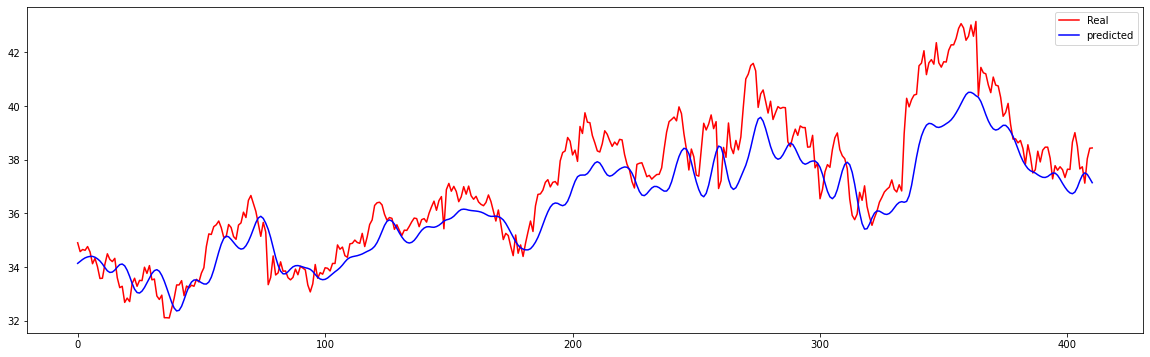

In [34]:
#viz results : comparaison du 1eme jour prédit vs la valeur réel de ce jour
plt.figure(figsize=(20, 6))
plt.plot(mat_test[:,0], color = 'red', label = 'Real') #Ajouter ici un nombre de jour si vous voulez voir p
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'predicted')
plt.legend()

print(predicted_stock_price.shape)
print(mat_test.shape)

(411, 30)
(411, 30)


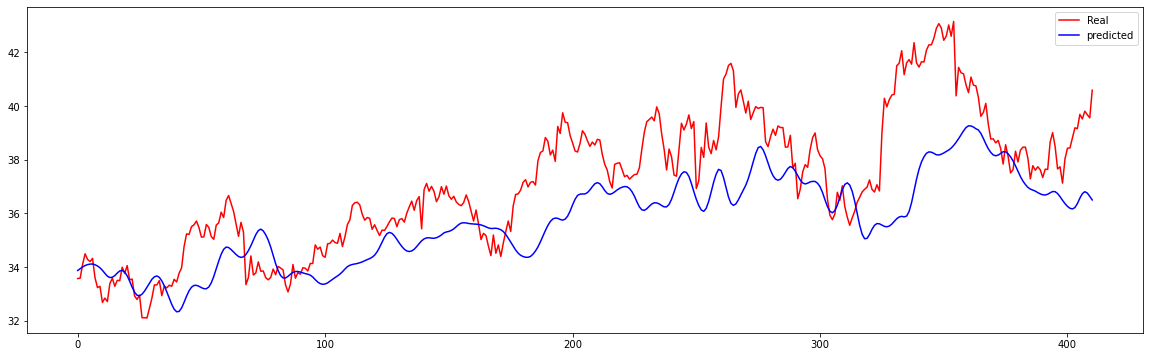

In [35]:
#viz results : comparaison du 10eme jour prédit vs la valeur réel de ce jour
plt.figure(figsize=(20, 6))
plt.plot(mat_test[:,9], color = 'red', label = 'Real') #Ajouter ici un nombre de jour si vous voulez voir p
plt.plot(predicted_stock_price[:,9], color = 'blue', label = 'predicted')
plt.legend()

print(predicted_stock_price.shape)
print(mat_test.shape)

(411, 30)
(411, 30)


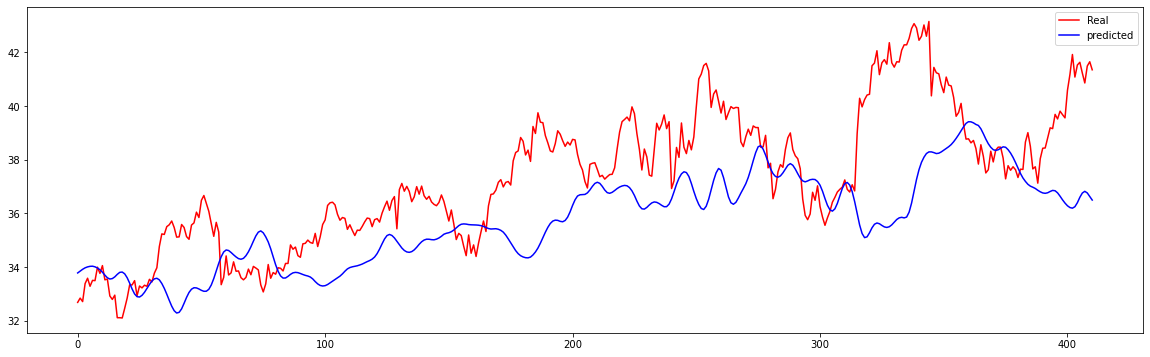

In [36]:
#viz results : comparaison du 20eme jour prédit vs la valeur réel de ce jour
plt.figure(figsize=(20, 6))
plt.plot(mat_test[:,19], color = 'red', label = 'Real') #Ajouter ici un nombre de jour si vous voulez voir p
plt.plot(predicted_stock_price[:,19], color = 'blue', label = 'predicted')
plt.legend()

print(predicted_stock_price.shape)
print(mat_test.shape)

(411, 30)
(411, 30)


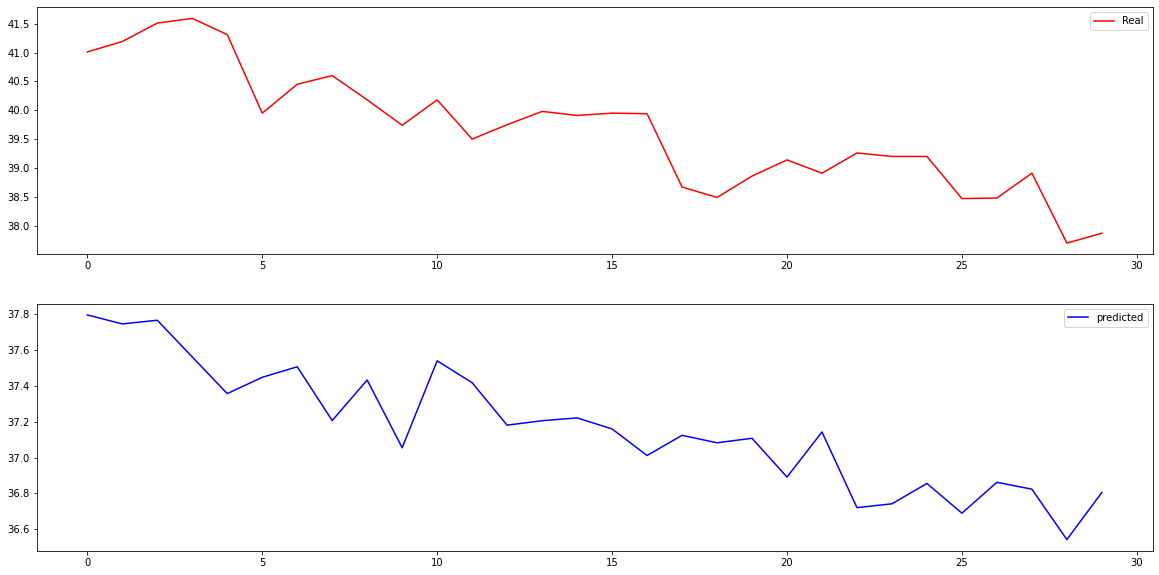

<Figure size 1440x1440 with 0 Axes>

In [37]:
#viz results : comparaison d'un vecteur prédictit vs vecteur réel
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
#fig.suptitle('Vertically stacked subplots')
plt.figure(figsize=(20, 20))
ax1.plot(mat_test[270,:], color = 'red', label = 'Real')
ax2.plot(predicted_stock_price[270,:], color = 'blue', label = 'predicted')
ax1.legend()
ax2.legend()


print(predicted_stock_price.shape)
print(mat_test.shape)

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

score, scores = evaluate_forecasts(mat_test,predicted_stock_price)
print("RMSE général: ", score,  "\nRMSE pour chaque jour\n", np.array(scores).reshape(-1,1))

RMSE général:  2.2740643926758373 
RMSE pour chaque jour
 [[1.22634689]
 [1.33500195]
 [1.38571252]
 [1.53408892]
 [1.71059678]
 [1.70239845]
 [1.69155891]
 [1.91083363]
 [1.81201186]
 [2.06257835]
 [1.870047  ]
 [1.97855052]
 [2.1502041 ]
 [2.16480759]
 [2.21796858]
 [2.28115172]
 [2.41999925]
 [2.38728438]
 [2.46058367]
 [2.50806524]
 [2.63025618]
 [2.51640166]
 [2.74113479]
 [2.77483701]
 [2.75551586]
 [2.86453602]
 [2.77647296]
 [2.8238559 ]
 [2.96946527]
 [2.8633174 ]]
